In [2]:
!pip install gradient_descent

  Created wheel for gradient-descent: filename=gradient_descent-0.0.3-py3-none-any.whl size=14329 sha256=6a81321ed48377e801dee55bd9fed2a2ccd66fe49a59bbc88d7e25f0b9ec6b8d
  Stored in directory: /root/.cache/pip/wheels/13/54/f8/690c42129d573a49713f4a07763e4c6884f61e5f18b2264c1a
Successfully built gradient-descent


In [3]:
from collections import Counter
import matplotlib.pyplot as plt
import random
import math
import numpy as np
import gradient_descent as gd

In [4]:
num_friends = [10, 49, 41, 40, 25, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 6, 6, 7, 7, 7, 8, 8, 10, 11, 11, 12, 12,
15, 15, 15, 18, 20, 20]
daily_min = [18, 39, 37, 35, 28, 7, 9, 8, 7, 8, 10, 11, 12, 9, 13, 15, 14, 14, 17, 16, 15, 19, 16, 21, 17, 19, 22, 18, 21, 20, 24, 23, 22, 25,
25, 27, 29, 28, 30, 32]
work_hours = [8, 6, 6, 6, 6, 9, 10, 10, 12, 11, 10, 9, 9, 10, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 8, 7, 7, 7, 7, 7, 7,
7, 6, 6, 6, 6, 6]
has_phd = [0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0]

In [5]:
def mean(x):
  return sum(x) / len(x)
  
def de_mean(x):
  x_bar = mean(x)
  return [x_i - x_bar for x_i in x]
  
def dot(v, w):
  return sum(v_i * w_i 
             for v_i, w_i in zip(v, w))
  
def sum_of_squares(x):
  return sum([x_i * x_i for x_i in x])
  
def variance(x):
  n = len(x)
  deviations = de_mean(x)
  return sum_of_squares(deviations) / (n-1)
  
def standard_deviation(x):
  return math.sqrt(variance(x))
  
def covariance(x, y):
  n = len(x)
  return dot(de_mean(x), de_mean(y)) / (n-1)
  
def correlation(x, y):
  stdev_x = standard_deviation(x)
  stdev_y = standard_deviation(y)
  if stdev_x > 0 and stdev_y > 0:
    return covariance(x, y) / stdev_x / stdev_y
  else:
    return

In [15]:
def predict(x_i, beta):
  """assumes that the first element of each x_i is 1"""
  return dot(x_i, beta)

In [16]:
[1,
 49,
 4,
 0]

[1, 49, 4, 0]

In [18]:
x=[[1, x1, x2, x3] for x1, x2, x3 in 
   zip(num_friends, work_hours, has_phd)]

In [19]:
x[:3]

[[1, 10, 8, 0], [1, 49, 6, 0], [1, 41, 6, 1]]

In [20]:
def error(x_i, y_i, beta):
  return y_i - predict(x_i, beta)

def squared_error(x_i, y_i, beta):
  return error(x_i, y_i, beta) ** 2
  
def squared_error_gradient(x_i, y_i, beta):
  """the gradient (with respect to beta) corresponding to the ith squared error term"""
  return[-2 * x_ij * error(x_i, y_i, beta) for x_ij in x_i]

In [21]:
def estimate_beta(x, y):
  beta_initial = [random.random() for x_i in x[0]]
  return gd.minimize_stochastic(squared_error,
                                squared_error_gradient,
                                x,y,
                                beta_initial,
                                0.001)

In [37]:
random.seed(0)
beta = estimate_beta(x, daily_min)

AttributeError: ignored

In [24]:
beta

NameError: ignored

In [25]:
def total_sum_of_squares(y):
  """the total squared variation of y_i's from their mean"""
  return sum(v ** 2 for v in de_mean(y))

def multiple_r_squared(x, y, beta):
  sum_of_squared_errors = sum(error(x_i, y_i, beta) ** 2
                              for x_i, y_i in zip(x, y))
  return 1.0-(sum_of_squared_errors / total_sum_of_squares(y))

In [35]:
print("R2 = ",multiple_r_squared(x,daily_min,beta))

NameError: ignored

AttributeError: ignored

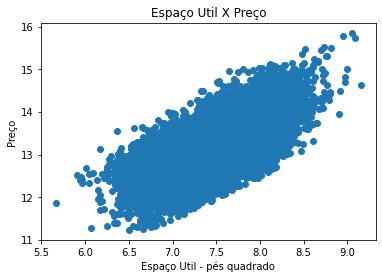

In [36]:
house_y = np.genfromtxt('/content/drive/MyDrive/dataset/kc_house_data.csv', missing_values=0, delimiter=',', skip_header=1, usecols=[2] )
house_y = np.log(house_y)

house_x = np.genfromtxt('/content/drive/MyDrive/dataset/kc_house_data.csv', missing_values=0.0001, delimiter=',', skip_header=1, usecols=[5,12,19] )
house_x = np.log(house_x)
house_x.shape

plt.scatter(house_x[:,1], house_y)
plt.title("Espaço Util X Preço")
plt.ylabel("Preço")
plt.xlabel("Espaço Util - pés quadrado")

house_x = np.inser(house_x, 0, values=int(1), axis=1)

random.seed(0)
beta_house = estimate_beta(house_x, house_y)

print(beta_house)
print("R2 =", multiple_r_squared(house_x, house_y, beta_house))

In [32]:
y = np.genfromtxt('/content/drive/MyDrive/dataset/kc_house_data.csv', missing_values=0, delimiter=',', skip_header=1, usecols=[2] )
y = np.log(y)

x = np.genfromtxt('/content/drive/MyDrive/dataset/kc_house_data.csv', missing_values=0.0001, delimiter=',', skip_header=1, usecols=[5,12,19,20] )
x = np.log(x)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x, y)
print(model.score(x, y))

0.4956430194547021
